In [1]:
cd("/home/joonheek/APMT-Julia")

using Pkg
Pkg.activate(".")

 Activating environment at `~/APMT-Julia/Project.toml`


In [2]:
using MAT
using ProgressBars
using JLD2
using SparseArrays
using PyCall
using PyPlot
using NCDatasets
using Statistics

cartopy = pyimport("cartopy")
ccrs = pyimport("cartopy.crs")
cfeat = pyimport("cartopy.feature");

#### Upload surface area grid and population grid files

In [3]:
#2x2.5 resolution grid

ds_grid_2x25 = NCDataset("/home/joonheek/APMT-Julia/regrid_files/regular_lat_lon_91x144.nc")
area_2x25 = float.(ds_grid_2x25["area"][:]); #m2

lon = ds_grid_2x25["lon"][:]
lat = ds_grid_2x25["lat"][:]

total_area = sum(area_2x25) #m2

println("total surface area = ", round(total_area/1e12, digits=2) , "e12 m²")

total surface area = 510.06e12 m²


In [4]:
#global population file in 2x2.5
ds_pop = NCDataset("/home/safrin/Python/Regrid_Output/Population_2015_2x2.5_PC_DC_global.nc")
pop_array = ds_pop["pop"][:,:,1] # (144,91) array
;

### Upload sensivities

In [5]:
ds_sens_2000 = NCDataset("/net/d15/data/jsoh/Sensitivity/2x25/NOx_new/Sen_LTO_result_2000_normalized_revised.nc")
ds_sens_2001 = NCDataset("/net/d15/data/jsoh/Sensitivity/2x25/NOx_new/Sen_LTO_result_2001_normalized_revised.nc")
ds_sens_2002 = NCDataset("/net/d15/data/jsoh/Sensitivity/2x25/NOx_new/Sen_LTO_result_2002_normalized_revised.nc")
ds_sens_2003 = NCDataset("/net/d15/data/jsoh/Sensitivity/2x25/NOx_new/Sen_LTO_result_2003_normalized_revised.nc")
ds_sens_2004 = NCDataset("/net/d15/data/jsoh/Sensitivity/2x25/NOx_new/Sen_LTO_result_2004_normalized_revised.nc")
;

In [24]:
height = float.(ds_sens_2000["height"][:]);

In [6]:
#Sensitivity_RF: convert (91 × 144 × 40) to (1 x 40)
sens_RF_2000 = float.(ds_sens_2000["Sensitivity_RF"][:])
sens_RF_2000 = permutedims(sens_RF_2000, [2, 1, 3])
sens_RF_2000 = reshape(sum(sens_RF_2000 .* area_2x25, dims=(1,2)) ./ total_area, 6)

sens_RF_2001 = float.(ds_sens_2001["Sensitivity_RF"][:])
sens_RF_2001 = permutedims(sens_RF_2001, [2, 1, 3])
sens_RF_2001 = reshape(sum(sens_RF_2001 .* area_2x25, dims=(1,2)) ./ total_area, 6)

sens_RF_2002 = float.(ds_sens_2002["Sensitivity_RF"][:])
sens_RF_2002 = permutedims(sens_RF_2002, [2, 1, 3])
sens_RF_2002 = reshape(sum(sens_RF_2002 .* area_2x25, dims=(1,2)) ./ total_area, 6)

sens_RF_2003 = float.(ds_sens_2003["Sensitivity_RF"][:])
sens_RF_2003 = permutedims(sens_RF_2003, [2, 1, 3])
sens_RF_2003 = reshape(sum(sens_RF_2003 .* area_2x25, dims=(1,2)) ./ total_area, 6)

sens_RF_2004 = float.(ds_sens_2004["Sensitivity_RF"][:])
sens_RF_2004 = permutedims(sens_RF_2004, [2, 1, 3])
sens_RF_2004 = reshape(sum(sens_RF_2004 .* area_2x25, dims=(1,2)) ./ total_area, 6)


# "Sensitivity_sfc_ozone" #91 × 144 × 40
sens_O3_2000 = float.(ds_sens_2000["Sensitivity_sfc_ozone"][:]) .* 1.5 #scaling 24hr-average to MDA8
sens_O3_2000 = permutedims(sens_O3_2000, [2, 1, 3])

sens_O3_2001 = float.(ds_sens_2001["Sensitivity_sfc_ozone"][:]) .* 1.5
sens_O3_2001 = permutedims(sens_O3_2001, [2, 1, 3])

sens_O3_2002 = float.(ds_sens_2002["Sensitivity_sfc_ozone"][:]) .* 1.5
sens_O3_2002 = permutedims(sens_O3_2002, [2, 1, 3])

sens_O3_2003 = float.(ds_sens_2003["Sensitivity_sfc_ozone"][:]) .* 1.5
sens_O3_2003 = permutedims(sens_O3_2003, [2, 1, 3])

sens_O3_2004 = float.(ds_sens_2004["Sensitivity_sfc_ozone"][:]) .* 1.5
sens_O3_2004 = permutedims(sens_O3_2004, [2, 1, 3])


# "Sensitivity_PM25" #91 × 144 × 40
sens_PM_2000 = float.(ds_sens_2000["Sensitivity_PM25"][:])
sens_PM_2000 = permutedims(sens_PM_2000, [2, 1, 3])

sens_PM_2001 = float.(ds_sens_2001["Sensitivity_PM25"][:])
sens_PM_2001 = permutedims(sens_PM_2001, [2, 1, 3])

sens_PM_2002 = float.(ds_sens_2002["Sensitivity_PM25"][:])
sens_PM_2002 = permutedims(sens_PM_2002, [2, 1, 3])

sens_PM_2003 = float.(ds_sens_2003["Sensitivity_PM25"][:])
sens_PM_2003 = permutedims(sens_PM_2003, [2, 1, 3])

sens_PM_2004 = float.(ds_sens_2004["Sensitivity_PM25"][:])
sens_PM_2004 = permutedims(sens_PM_2004, [2, 1, 3])


# "Sensitivity_col_ozone": convert (91 × 144 × 40) to (144 x 91 x 40)
sens_colO3_2000 = float.(ds_sens_2000["Sensitivity_col_ozone"][:])
sens_colO3_2000 = permutedims(sens_colO3_2000, [2, 1, 3])

sens_colO3_2001 = float.(ds_sens_2001["Sensitivity_col_ozone"][:])
sens_colO3_2001 = permutedims(sens_colO3_2001, [2, 1, 3])

sens_colO3_2002 = float.(ds_sens_2002["Sensitivity_col_ozone"][:])
sens_colO3_2002 = permutedims(sens_colO3_2002, [2, 1, 3])

sens_colO3_2003 = float.(ds_sens_2003["Sensitivity_col_ozone"][:])
sens_colO3_2003 = permutedims(sens_colO3_2003, [2, 1, 3])

sens_colO3_2004 = float.(ds_sens_2004["Sensitivity_col_ozone"][:])
sens_colO3_2004 = permutedims(sens_colO3_2004, [2, 1, 3])


# "Sensitivity_zonal_ozone": (72 × 91 × 40)
sens_zonalO3_2000 = float.(ds_sens_2000["Sensitivity_zonal_ozone"][:])

sens_zonalO3_2001 = float.(ds_sens_2001["Sensitivity_zonal_ozone"][:])

sens_zonalO3_2002 = float.(ds_sens_2002["Sensitivity_zonal_ozone"][:])

sens_zonalO3_2003 = float.(ds_sens_2003["Sensitivity_zonal_ozone"][:])

sens_zonalO3_2004 = float.(ds_sens_2004["Sensitivity_zonal_ozone"][:])
;

In [7]:
sens_years = 2000:2004
n_LTO = 6
region_names = ["North America",
                "South America",
                "Europe + Middle East + Siberia",
                "Africa",
                "East Asia + India",
                "Oceania + South Asia"]
;

In [9]:
#create dictionaries for cruise sensitivities (1-6), convert to per Gg NOx

#dict:                  sensitivity #        
#       -> "LTO"  -> 1                   -> "data"  -> Array, size(year) or size(144,91,year)
#                    -> 2                   -> other variables
#         ...                    .....
#                    -> 40


RF_dict = Dict{String,Dict{Int64,Dict{String,Any}}}()
PM_dict = Dict{String,Dict{Int64,Dict{String,Any}}}()
O3_dict = Dict{String,Dict{Int64,Dict{String,Any}}}()
colO3_dict = Dict{String,Dict{Int64,Dict{String,Any}}}()
zonalO3_dict = Dict{String,Dict{Int64,Dict{String,Any}}}()

RF_dict["LTO"] = Dict{Int64,Dict{String,Any}}()
PM_dict["LTO"] = Dict{Int64,Dict{String,Any}}()
O3_dict["LTO"] = Dict{Int64,Dict{String,Any}}()
colO3_dict["LTO"] = Dict{Int64,Dict{String,Any}}()
zonalO3_dict["LTO"] = Dict{Int64,Dict{String,Any}}()

for i in 1:n_LTO
    RF_dict["LTO"][i] = Dict{String,Any}()
    RF_dict["LTO"][i]["data"] = zeros(length(sens_years))
    RF_dict["LTO"][i]["data"][1] += sens_RF_2000[i]
    RF_dict["LTO"][i]["data"][2] += sens_RF_2001[i]
    RF_dict["LTO"][i]["data"][3] += sens_RF_2002[i]
    RF_dict["LTO"][i]["data"][4] += sens_RF_2003[i]
    RF_dict["LTO"][i]["data"][5] += sens_RF_2004[i]
    
    PM_dict["LTO"][i] = Dict{String,Any}()
    PM_dict["LTO"][i]["data"] = zeros(144,91,length(sens_years))
    PM_dict["LTO"][i]["data"][:,:,1] .+= sens_PM_2000[:,:,i]
    PM_dict["LTO"][i]["data"][:,:,2] .+= sens_PM_2001[:,:,i]
    PM_dict["LTO"][i]["data"][:,:,3] .+= sens_PM_2002[:,:,i]
    PM_dict["LTO"][i]["data"][:,:,4] .+= sens_PM_2003[:,:,i]
    PM_dict["LTO"][i]["data"][:,:,5] .+= sens_PM_2004[:,:,i]
    
    O3_dict["LTO"][i] = Dict{String,Any}()
    O3_dict["LTO"][i]["data"] = zeros(144,91,length(sens_years))
    O3_dict["LTO"][i]["data"][:,:,1] .+= sens_O3_2000[:,:,i]
    O3_dict["LTO"][i]["data"][:,:,2] .+= sens_O3_2001[:,:,i]
    O3_dict["LTO"][i]["data"][:,:,3] .+= sens_O3_2002[:,:,i]
    O3_dict["LTO"][i]["data"][:,:,4] .+= sens_O3_2003[:,:,i]
    O3_dict["LTO"][i]["data"][:,:,5] .+= sens_O3_2004[:,:,i]
    
    colO3_dict["LTO"][i] = Dict{String,Any}()
    colO3_dict["LTO"][i]["data"] = zeros(144,91,length(sens_years))
    colO3_dict["LTO"][i]["data"][:,:,1] .+= sens_colO3_2000[:,:,i]
    colO3_dict["LTO"][i]["data"][:,:,2] .+= sens_colO3_2001[:,:,i]
    colO3_dict["LTO"][i]["data"][:,:,3] .+= sens_colO3_2002[:,:,i]
    colO3_dict["LTO"][i]["data"][:,:,4] .+= sens_colO3_2003[:,:,i]
    colO3_dict["LTO"][i]["data"][:,:,5] .+= sens_colO3_2004[:,:,i]
    
    zonalO3_dict["LTO"][i] = Dict{String,Any}()
    zonalO3_dict["LTO"][i]["data"] = zeros(72, 91,length(sens_years))
    zonalO3_dict["LTO"][i]["data"][:,:,1] .+= sens_zonalO3_2000[:,:,i]
    zonalO3_dict["LTO"][i]["data"][:,:,2] .+= sens_zonalO3_2001[:,:,i]
    zonalO3_dict["LTO"][i]["data"][:,:,3] .+= sens_zonalO3_2002[:,:,i]
    zonalO3_dict["LTO"][i]["data"][:,:,4] .+= sens_zonalO3_2003[:,:,i]
    zonalO3_dict["LTO"][i]["data"][:,:,5] .+= sens_zonalO3_2004[:,:,i]
end

In [10]:
RF_dict["LTO"][2]

Dict{String,Any} with 1 entry:
  "data" => [-8.61862e-6, -1.70548e-6, 6.8705e-6, 8.52874e-6, 1.54295e-5]

## Figures

In [14]:
plt.rc("font", size=8)

### RF

In [15]:
fix_RF_ylim = true
;

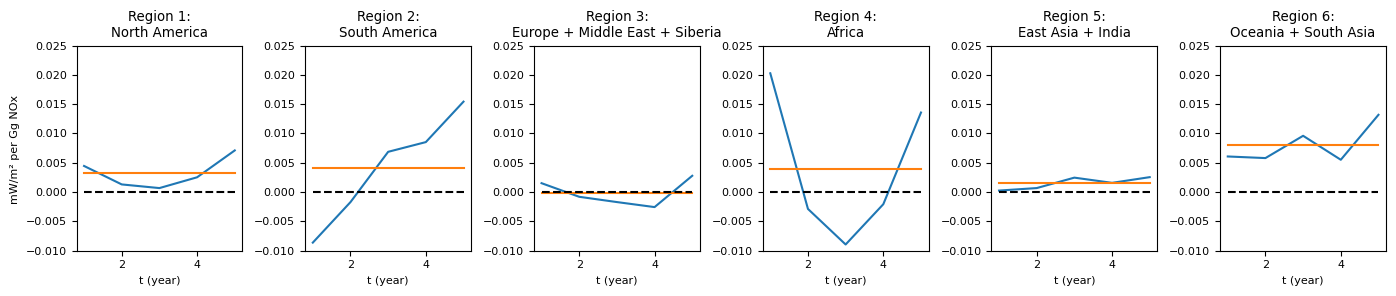

In [16]:
fig, axs = plt.subplots(1, 6, figsize=(14, 3))
for i in 1:n_LTO
    r_name = region_names[i]
    RFs = RF_dict["LTO"][i]["data"]
    axs[i].plot(1:5, RFs.*1e3)

    avg_RF = mean(RF_dict["LTO"][i]["data"]) .* 1e3
    axs[i].plot(1:5, ones(5).*avg_RF)

    axs[i].plot([1,5], [0,0], "k--", )

    axs[i].set(title="Region "*string(i)*":"*"\n"*r_name)
    axs[i].set(xlabel="t (year)")
    if fix_RF_ylim
        axs[i].set(ylim=[-0.01,0.025])
    end
end

axs[1].set(ylabel="mW/m² per Gg NOx ")

fig.tight_layout()

### PM2.5

In [17]:
fix_PM_ylim = true
;

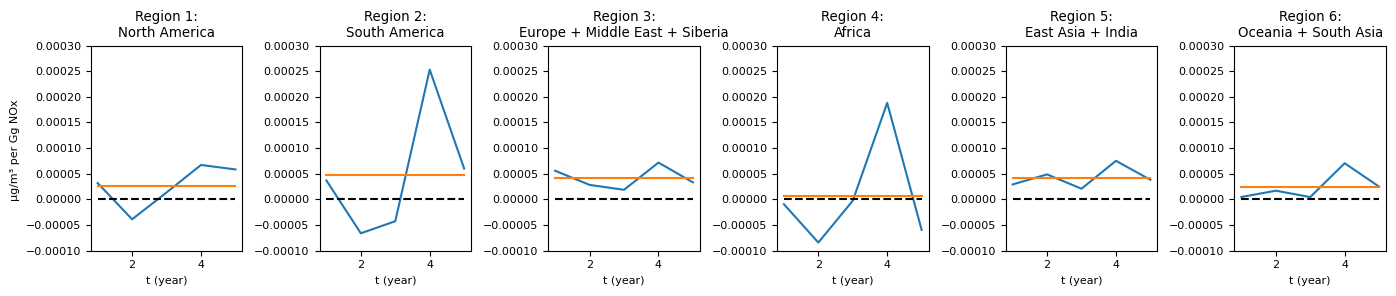

In [18]:
fig, axs = plt.subplots(1, 6, figsize=(14, 3))
for i in 1:n_LTO
    r_name = region_names[i]
    avg_exp = vec(sum(PM_dict["LTO"][i]["data"] .* pop_array, dims=(1,2)) ./ sum(pop_array))
    axs[i].plot(1:5, avg_exp)
    
    avg_grid = mean(PM_dict["LTO"][i]["data"],dims=3)[:,:,1]
    avg_grid_avg_exp = repeat(sum(avg_grid .* pop_array, dims=(1,2)) ./ sum(pop_array),5)
    axs[i].plot(1:5, avg_grid_avg_exp)
    
    axs[i].plot([1,5], [0,0], "k--", )
    
    axs[i].set(title="Region "*string(i)*":"*"\n"*r_name)
    axs[i].set(xlabel="t (year)")
    if fix_PM_ylim
        axs[i].set(ylim=[-1e-4,3e-4])
    end
end

axs[1].set(ylabel="μg/m³ per Gg NOx ")

fig.tight_layout()

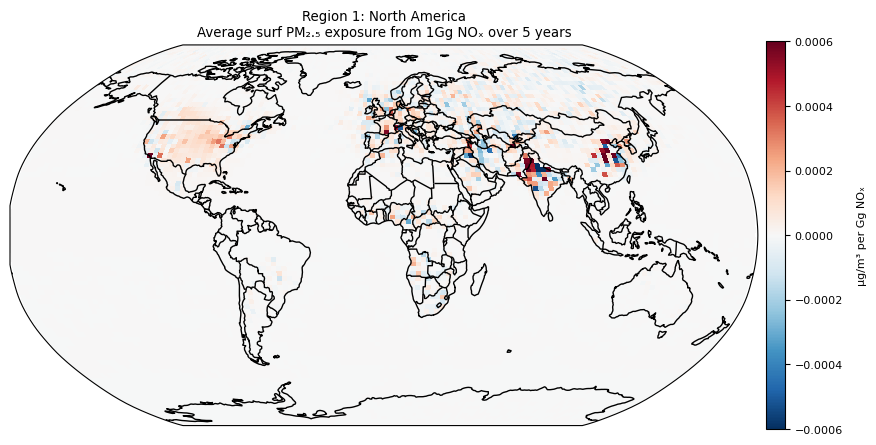

In [19]:
i = 1
r_name = region_names[i]
avg_grid = mean(PM_dict["LTO"][i]["data"],dims=3)[:,:,1]

figure(figsize=(10, 8))
ax = subplot(projection=ccrs.Robinson())

ax.add_feature(cfeat.COASTLINE)
ax.add_feature(cfeat.BORDERS)
h = ax.pcolormesh(repeat(lon,1,91), repeat(reshape(lat,1,length(lat)),144,1), 
                avg_grid, transform=ccrs.PlateCarree(), 
                vmin=-6e-4, vmax=6e-4,cmap="RdBu_r",
)

title("Region "*string(i)*": "*r_name*"\n"*"Average surf PM₂.₅ exposure from 1Gg NOₓ over 5 years")
cbar = plt.colorbar(h,fraction=0.025, pad=0.01)
cbar.set_label("μg/m³ per Gg NOₓ", labelpad=10)
;

### surface O3

In [20]:
fix_O3_ylim = true
;

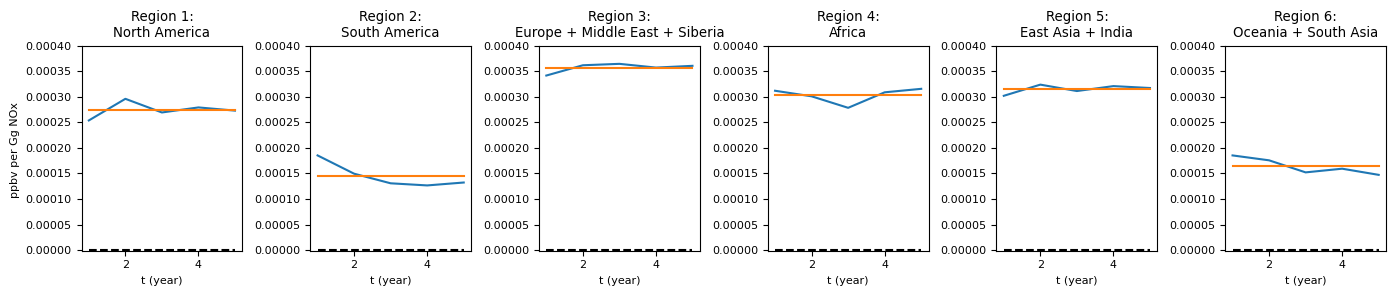

In [21]:
fig, axs = plt.subplots(1, 6, figsize=(14, 3))
for i in 1:n_LTO
    r_name = region_names[i]
    avg_exp = vec(sum(O3_dict["LTO"][i]["data"] .* pop_array, dims=(1,2)) ./ sum(pop_array))
    axs[i].plot(1:5, avg_exp)
    
    avg_grid = mean(O3_dict["LTO"][i]["data"],dims=3)[:,:,1]
    avg_grid_avg_exp = repeat(sum(avg_grid .* pop_array, dims=(1,2)) ./ sum(pop_array),5)
    axs[i].plot(1:5, avg_grid_avg_exp)
    
    axs[i].plot([1,5], [0,0], "k--", )
    
    axs[i].set(title="Region "*string(i)*":"*"\n"*r_name)
    axs[i].set(xlabel="t (year)")
    if fix_O3_ylim
        axs[i].set(ylim=[-1e-6,4e-4])
    end
end

axs[1].set(ylabel="ppbv per Gg NOx ")

fig.tight_layout()

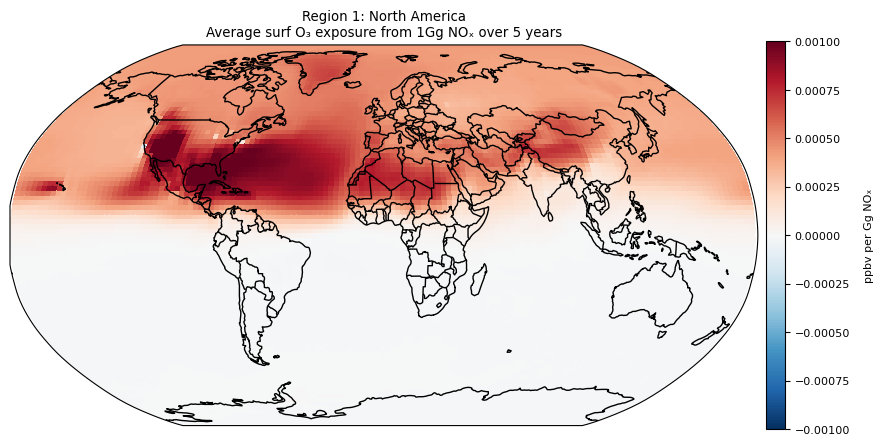

In [22]:
i = 1
r_name = region_names[i]
avg_grid = mean(O3_dict["LTO"][i]["data"],dims=3)[:,:,1]

figure(figsize=(10, 8))
ax = subplot(projection=ccrs.Robinson())

ax.add_feature(cfeat.COASTLINE)
ax.add_feature(cfeat.BORDERS)
h = ax.pcolormesh(repeat(lon,1,91), repeat(reshape(lat,1,length(lat)),144,1), 
                avg_grid, transform=ccrs.PlateCarree(), 
                vmin=-10e-4, vmax=10e-4,cmap="RdBu_r",
)

title("Region "*string(i)*": "*r_name*"\n"*"Average surf O₃ exposure from 1Gg NOₓ over 5 years")
cbar = plt.colorbar(h,fraction=0.025, pad=0.01)
cbar.set_label("ppbv per Gg NOₓ", labelpad=10)
;

### column O3

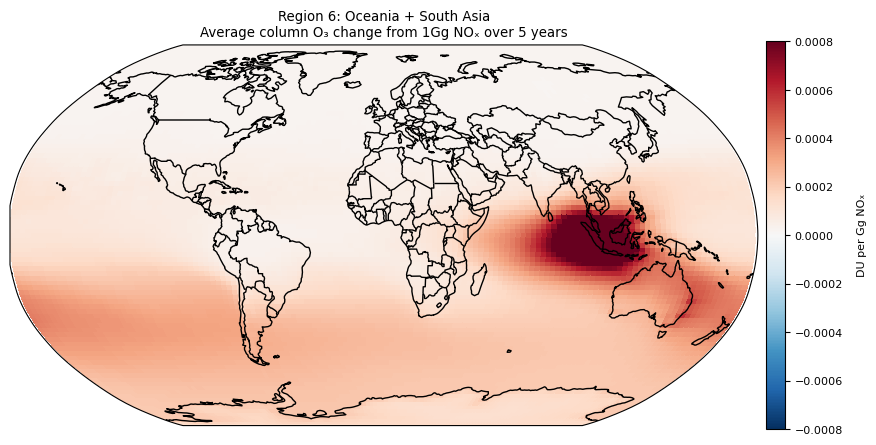

In [23]:
i = 6
r_name = region_names[i]
avg_grid = mean(colO3_dict["LTO"][i]["data"],dims=3)[:,:,1]

figure(figsize=(10, 8))
ax = subplot(projection=ccrs.Robinson())

ax.add_feature(cfeat.COASTLINE)
ax.add_feature(cfeat.BORDERS)
h = ax.pcolormesh(repeat(lon,1,91), repeat(reshape(lat,1,length(lat)),144,1), 
                avg_grid, transform=ccrs.PlateCarree(), 
                vmin=-8e-4, vmax=8e-4,cmap="RdBu_r",
)

title("Region "*string(i)*": "*r_name*"\n"*"Average column O₃ change from 1Gg NOₓ over 5 years")
cbar = plt.colorbar(h,fraction=0.025, pad=0.01)
cbar.set_label("DU per Gg NOₓ", labelpad=10)


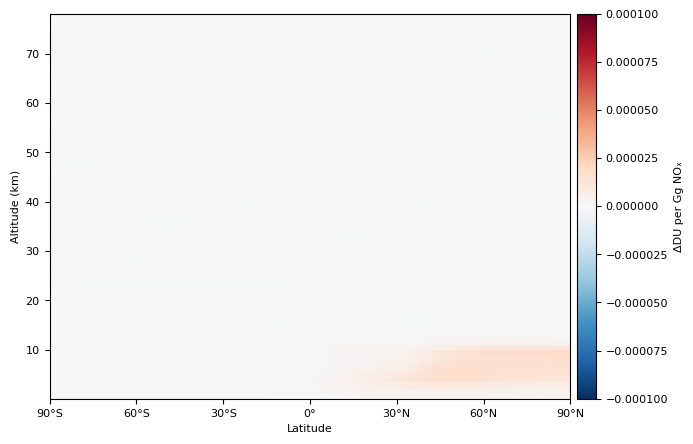

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(8,5))
h = ax.pcolormesh(lat,height, 
                    zonalO3_dict["LTO"][3]["data"][:,:,1],
                    vmin=-0.0001,
                    vmax=0.0001,
                    cmap="RdBu_r",
                        )
cbar = plt.colorbar(h,pad=0.01)
cbar.set_label("ΔDU per Gg NOₓ")

plt.ylabel("Altitude (km)")
plt.xlabel("Latitude")

ax.set_xticks([-90,-60,-30,0,30,60,90])
ax.set_xticklabels(["90°S","60°S","30°S","0°","30°N","60°N","90°N"])

plt.show()

## SAVE as NC files -> to be opened/read in APMT

scale the NOx RF sensitivities to APMT (subsonic) to capture long-wave (negative) effects

In [27]:
file = matopen("/home/joonheek/NOx_sensitivities/RF_NOx.mat")
RF_O3_short = read(file, "RF_O3_short")
RF_O3_long = read(file, "RF_O3_long")
RF_N_short = read(file, "RF_N_short")
RF_CH4_long = read(file, "RF_CH4_long")
RF_NOx_total = read(file, "RF_NOx_total")
close(file)


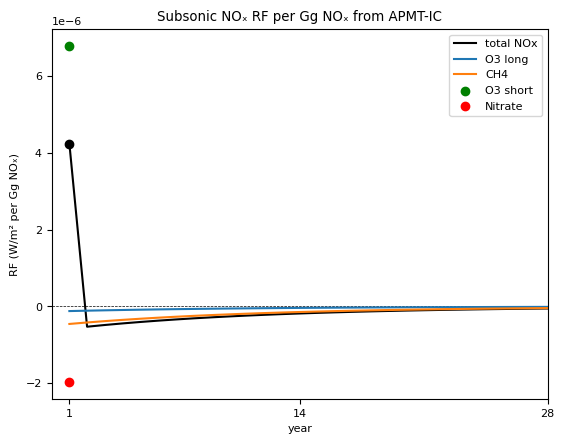

In [28]:
plt.plot(0:28, zeros(29), label="", lw=0.5, ls="--", c="black")
plt.plot(1:28, RF_NOx_total[1:28], label="total NOx", c="black")
plt.plot(1:28, RF_O3_long[1:28], label="O3 long")
plt.plot(1:28, RF_CH4_long[1:28], label="CH4")

plt.scatter(1,RF_NOx_total[1], c="black",label="")
plt.scatter(1, RF_O3_short[1], c="green", label="O3 short")
plt.scatter(1, RF_N_short[1], c="red", label="Nitrate")


plt.title("Subsonic NOₓ RF per Gg NOₓ from APMT-IC")

plt.xlim([0, 28])
plt.xticks([1,14,28])

plt.ylabel("RF (W/m² per Gg NOₓ)")
plt.xlabel("year")
plt.legend()
plt.show()

In [31]:
sensitivity_folder = "/home/joonheek/NOx_sensitivities/nc_files/files/"

"/home/joonheek/NOx_sensitivities/nc_files/files/"

In [32]:
for i in 1:6
    r_name = region_names[i]

    n_years = 28
    
    #repeat average RF for every future year
    avg_RF = repeat([mean(RF_dict["LTO"][i]["data"])],n_years) #W/m2 per Gg NOx
    
    #scale NOx RF based on subsonic/APMT NOx RF
    RF_NOx_sub = RF_NOx_total[1] #from APMT - scaling point (W/m2 per Gg NOx)
    RF_NOx_i = mean(RF_dict["LTO"][i]["data"])
    ratio = RF_NOx_i/RF_NOx_sub
    RF_NOx_scaled = cat([RF_NOx_i], ratio .* RF_NOx_total[2:28], dims=1) #W/m2 per Gg NOx
    
    #save IMPULSE responses (only have first year's response = average of first five years)
    avg_PM_grid = mean(PM_dict["LTO"][i]["data"],dims=3) #μg/m³ per Gg NOx
    avg_O3_grid = mean(O3_dict["LTO"][i]["data"],dims=3) #ppbv per Gg NOx
    avg_colO3_grid = mean(colO3_dict["LTO"][i]["data"],dims=3) #DU per Gg NOx
    avg_zonalO3_grid = mean(zonalO3_dict["LTO"][i]["data"],dims=3) #DU per Gg NOx

    mask_latlon = float.(NCDataset("/home/joonheek/NOx_sensitivities/LTO/LTO_mask_"*string(i)*"_2x25.nc")["mask"][:])
    lev_47 = collect(1:26)
    lev_72 = collect(1:26)
    
    
    ds = NCDataset(sensitivity_folder*"sensitivity_"*string(i+40)*".nc","c")

    defDim(ds,"lon",144)
    defDim(ds,"lat",91)
    defDim(ds, "alt",72)
    defDim(ds,"RFyear",n_years)
    defDim(ds,"AQyear",1)
    defDim(ds,"O3year",1)
    defDim(ds,"lev_47",length(lev_47))
    defDim(ds,"lev_72",length(lev_72))

    ds.attrib["title"] = "Sensitivities for case/number "*string(i)*": LTO, "*r_name

    RF = defVar(ds, "RF", Float64, ("RFyear",))
    RF[:] = RF_NOx_scaled
    RF.attrib["units"] = "W/m2 per Gg NOx"

    PM25 = defVar(ds, "PM25", Float64, ("lon","lat","AQyear"))
    PM25[:,:,:] = avg_PM_grid
    PM25.attrib["units"] = "μg/m³ per Gg NOx"

    Sfc_O3 = defVar(ds, "Sfc_O3", Float64, ("lon","lat","AQyear"))
    Sfc_O3[:,:,:] = avg_O3_grid
    Sfc_O3.attrib["units"] = "ppbv per Gg NOx"
    
    Col_O3 = defVar(ds, "Col_O3", Float64, ("lon","lat","O3year"))
    Col_O3[:,:,:] = avg_colO3_grid
    Col_O3.attrib["units"] = "DU per Gg NOx"
    
    Zonal_O3 = defVar(ds, "Zonal_O3", Float64, ("alt", "lat", "O3year"))
    Zonal_O3[:,:,:] = avg_zonalO3_grid
    Zonal_O3.attrib["units"] = "DU per Gg NOx"
    
    
    mask = defVar(ds, "mask", Float64, ("lon", "lat"))
    mask[:,:] = mask_latlon
    mask.attrib["comments"] = "horizontal mask to be multiplied by emissions inventory"

    dim_lon = defVar(ds, "lon", Float64, ("lon",))
    dim_lon[:] = lon

    dim_lat = defVar(ds, "lat", Float64, ("lat",))
    dim_lat[:] = lat
    
    dim_alt = defVar(ds, "alt", Float64, ("alt",))
    dim_alt[:] = height

    dim_RFyear = defVar(ds, "RFyear", Int64, ("RFyear",))
    dim_RFyear[:] = collect(1:n_years)
    
    dim_AQyear = defVar(ds, "AQyear", Int64, ("AQyear",))
    dim_AQyear[:] = [1]   

    dim_O3year = defVar(ds, "O3year", Int64, ("O3year",))
    dim_O3year[:] = [1]   
    
    dim_lev_47 = defVar(ds, "lev_47", Int64, ("lev_47",))
    dim_lev_47[:] = lev_47
    dim_lev_47.attrib["comments"] = "specifies the indices of the vertical layers corresponding to 47-layer grid"

    dim_lev_72 = defVar(ds, "lev_72", Int64, ("lev_72",))
    dim_lev_72[:] = lev_72
    dim_lev_72.attrib["comments"] = "specifies the indices of the vertical layers corresponding to 72-layer grid"

    close(ds)
    
end

In [33]:
ds = NCDataset("/home/joonheek/NOx_sensitivities/nc_files/files/sensitivity_41.nc")

NCDataset: /home/joonheek/NOx_sensitivities/nc_files/files/sensitivity_41.nc
Group: /

Dimensions
   lon = 144
   lat = 91
   alt = 72
   RFyear = 28
   AQyear = 1
   O3year = 1
   lev_47 = 26
   lev_72 = 26

Variables
  RF   (28)
    Datatype:    Float64
    Dimensions:  RFyear
    Attributes:
     units                = W/m2 per Gg NOx

  PM25   (144 × 91 × 1)
    Datatype:    Float64
    Dimensions:  lon × lat × AQyear
    Attributes:
     units                = μg/m³ per Gg NOx

  Sfc_O3   (144 × 91 × 1)
    Datatype:    Float64
    Dimensions:  lon × lat × AQyear
    Attributes:
     units                = ppbv per Gg NOx

  Col_O3   (144 × 91 × 1)
    Datatype:    Float64
    Dimensions:  lon × lat × O3year
    Attributes:
     units                = DU per Gg NOx

  Zonal_O3   (72 × 91 × 1)
    Datatype:    Float64
    Dimensions:  alt × lat × O3year
    Attributes:
     units                = DU per Gg NOx

  mask   (144 × 91)
    Datatype:    Float64
    Dimensions:  lon × lat